In [14]:
import sys
import numpy as np
import astropy.table as table
import matplotlib.pyplot as plt
import pandas as pd
try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')
import snelib19odp.colors as colors

In [15]:
# load the ztflc lc
ztflc = table.Table.read('../data/ztflc_forcefit.h5')
ztflc.sort('obsmjd')
ztflc['mag'] = -2.5*np.log10(ztflc['ampl']) + ztflc['magzp']
ztflc

<ipython-input-15-a30c7b06ad89>:4: RuntimeWarning: invalid value encountered in log10
  ztflc['mag'] = -2.5*np.log10(ztflc['ampl']) + ztflc['magzp']


<Table length=287>
      sigma             sigma.err      ...      target_y             mag        
     float64             float64       ...      float64            float64      
------------------ ------------------- ... ------------------ ------------------
 5.084136052596823 0.14598030314058213 ... 2606.1735575838757                nan
 4.429017756876249 0.13089623320578814 ... 2613.2088222185594 22.522869909718985
7.5097771045959565 0.21343025115356465 ...  2610.284380781367                nan
 4.316967482833462 0.12346071704666518 ... 2577.8349804398767 23.781600335783295
 6.912187465035628  0.1926813979405453 ... 2592.1475584028817  23.51388884004972
 4.847475113950799 0.14199017641917233 ...  2595.303972080399 21.796113445973127
 8.468640852051923 0.23663097108285228 ... 2595.2233197896458 22.515668644847334
5.7556202461528025 0.16507011574947664 ... 2682.5249025721896                nan
10.685178556147084 0.11571123951332839 ...  2589.119099724356                nan
12.701894355627289  0.3536305646637821 ...  2598.215541925122 23.572258746387234
               ...                 ... ...                ...                ...
11.756126965829814 0.33270753646618856 ... 2663.2146012748394  21.50395730414951
10.508604769883636  0.2980412226697699 ...  2662.399013632238 22.087256409774486
13.380180036161295 0.37292168647668056 ... 2648.5709880383693  22.26450975446578
15.854730822439397 0.46644715869210285 ...  2655.896776613848 23.031992080419244
 13.60963241181266 0.38560315389397826 ... 2640.1407713318695  21.22684839145415
 11.16743042466407  0.3051480017291456 ...  2654.529378514161 21.483159364031334
 7.608362038731256 0.21204732924074718 ... 2653.5931417421016 21.719499285365988
 5.380505973919246  0.1545084515835955 ...  2647.907300089115  21.48688666250209
 4.823029789358324 0.13353517841322923 ... 2659.5571462288713 22.460073356834926
 4.998202581685263 0.13419440737214583 ... 2641.1007093342896 21.479549576048093

In [29]:
#nora = table.Table.read('../data/nora_force_phot/ZTF19abqwtfu_0d.escv', format='ascii.ecsv')
nora = table.Table.read('../data/nora_force_phot/ZTF19abqwtfu_nocuts.escv', format='ascii.ecsv')
nora['mjd'] = nora['jdobs'] - 2400000.5
nora['flux'] = nora['Flux_maxlike']
nora['flux_err_sys'] = nora['Flux_maxlike_unc']
nora

<Table length=847>
     jdobs      filter  seeing ...         flux           flux_err_sys   
    float64      str1  float64 ...       float64            float64      
--------------- ------ ------- ... ------------------- ------------------
2458256.9873495      r   2.591 ...   52.18318176269531 46.754608154296875
2458259.9668287      r   1.858 ...  1.6460424661636353 18.595624923706055
2458268.9456713      r   2.502 ...  22.281198501586914  50.19049072265625
2458271.9413657      r   1.998 ...  -55.48629379272461  42.57772445678711
2458278.9256019      g   3.497 ...   2.731076955795288  34.07603454589844
2458278.9765162      r   1.912 ...  0.2937716543674469  27.25257110595703
2458281.9628241      r   2.371 ...   5.960686206817627  21.48567771911621
2458284.9783681      r   1.855 ...   37.72602081298828 37.121273040771484
2458287.9234722      g   2.869 ...  36.762359619140625  27.55112648010254
2458290.9431134      g   2.799 ...  -26.69509506225586  23.98837661743164
            ...    ...     ... ...                 ...                ...
2459504.7358218      g   1.842 ...  163.45846557617188  62.94862747192383
2459504.8110532      r   1.982 ...  -12.69778060913086  65.16854095458984
2459510.7500926      g    1.82 ...  30.057661056518555 48.530677795410156
2459510.7991782      r   1.928 ...  0.3709458112716675  72.99675750732422
2459517.6447338      r   1.576 ... -12.225296974182129 21.258176803588867
2459517.7051389      g   1.855 ...  57.965553283691406 21.491680145263672
2459520.7123032      r   2.002 ...    24.6392765045166 24.831815719604492
2459520.7763889      g   2.099 ...  45.455692291259766 26.584447860717773
 2459522.708044      r   2.189 ...  -39.74303436279297 24.883737564086914
2459522.7129282      g   2.541 ...  28.140504837036133 27.197256088256836

Text(0, 0.5, 'Flux [uJy]')

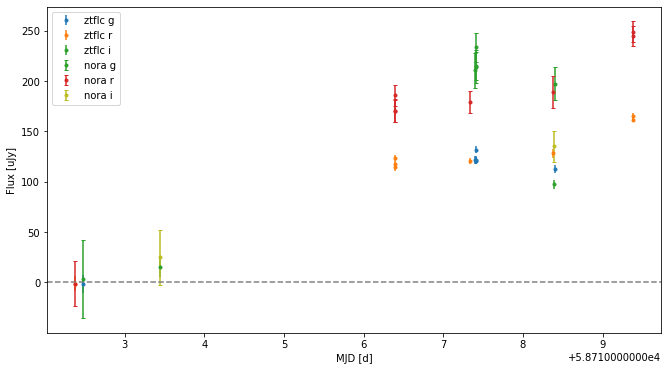

In [25]:
scalezp = 0

plt.figure(figsize=(11,6))

# plot ztflc
for band in 'gri':
    # plot ztflc lc
    idx = np.logical_and(ztflc['filter'] == ('ZTF_%s' % band), np.logical_and(ztflc['obsmjd'] > 58710, ztflc['obsmjd'] < 58720))
    f0coef = 3631e6 * 10 ** (-(ztflc["magzp"][idx] - scalezp) / 2.5)
    plt.errorbar(ztflc['obsmjd'][idx], f0coef*ztflc['ampl'][idx], yerr=f0coef*ztflc['ampl.err'][idx], fmt='.', label='ztflc %s' % band)#, color=colors.BAND_COLOR_MAP[band])

for band in 'gri':
    idx = np.logical_and(nora['filter'] == band, np.logical_and(nora['mjd'] > 58710, nora['mjd'] < 58720))
    plt.errorbar(nora['mjd'][idx], nora['flux'][idx]*3631e6, yerr=nora['flux_err_sys'][idx]*3631e6, fmt='.', label='nora %s' % band, capsize=2, color=colors.BAND_COLOR_MAP[band])
    
plt.axhline(0, ls="--", color="0.5")
plt.legend()
plt.xlabel('MJD [d]')
plt.ylabel('Flux [uJy]')
    

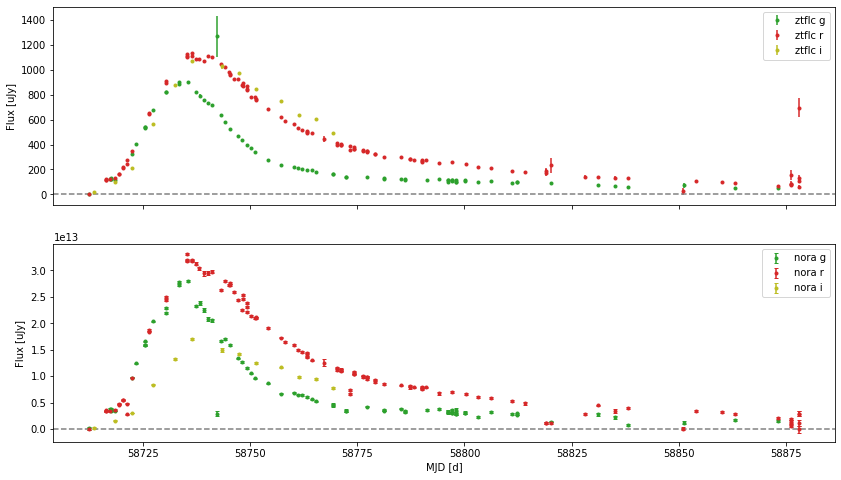

In [30]:
scalezp = 0

#plt.figure(figsize=(11,6))

fig, axs = plt.subplots(2, figsize=(14,8), sharex=True)
ax1,ax2 = axs


#end_mjd = 58820
end_mjd = 58900

# plot ztflc
for band in 'gri':
    # plot ztflc lc
    idx = np.logical_and(ztflc['filter'] == ('ZTF_%s' % band), np.logical_and(ztflc['obsmjd'] > 58710, ztflc['obsmjd'] < end_mjd))
    f0coef = 3631e6 * 10 ** (-(ztflc["magzp"][idx] - scalezp) / 2.5)
    ax1.errorbar(ztflc['obsmjd'][idx], f0coef*ztflc['ampl'][idx], yerr=f0coef*ztflc['ampl.err'][idx], fmt='.', label='ztflc %s' % band, color=colors.BAND_COLOR_MAP[band])

for band in 'gri':
    idx = np.logical_and(nora['filter'] == band, np.logical_and(nora['mjd'] > 58710, nora['mjd'] < end_mjd))
    ax2.errorbar(nora['mjd'][idx], nora['flux'][idx]*3631e6, yerr=nora['flux_err_sys'][idx]*3631e6, fmt='.', label='nora %s' % band, capsize=2, color=colors.BAND_COLOR_MAP[band])
    
ax2.axhline(0, ls="--", color="0.5")
ax2.legend()
ax2.set_xlabel('MJD [d]')
ax1.axhline(0, ls="--", color="0.5")
ax1.legend()
ax1.set_ylabel('Flux [uJy]')
ax2.set_ylabel('Flux [uJy]')
fig.savefig('2022-01-04-nora-lc-comparison.png')

Text(0, 0.5, 'Flux [uJy]')

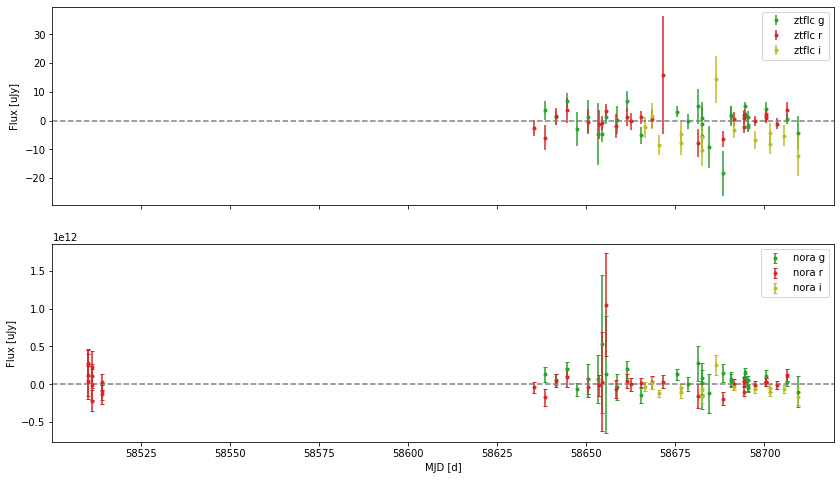

In [31]:
# pre-explosion
scalezp = 0

#plt.figure(figsize=(11,6))

fig, axs = plt.subplots(2, figsize=(14,8), sharex=True)
ax1,ax2 = axs

start_mjd = 58500
#end_mjd = 58820
end_mjd = 58710

# plot ztflc
for band in 'gri':
    # plot ztflc lc
    idx = np.logical_and(ztflc['filter'] == ('ZTF_%s' % band), np.logical_and(ztflc['obsmjd'] > start_mjd, ztflc['obsmjd'] < end_mjd))
    f0coef = 3631e6 * 10 ** (-(ztflc["magzp"][idx] - scalezp) / 2.5)
    ax1.errorbar(ztflc['obsmjd'][idx], f0coef*ztflc['ampl'][idx], yerr=f0coef*ztflc['ampl.err'][idx], fmt='.', label='ztflc %s' % band, color=colors.BAND_COLOR_MAP[band])

for band in 'gri':
    idx = np.logical_and(nora['filter'] == band, np.logical_and(nora['mjd'] > start_mjd, nora['mjd'] < end_mjd))
    ax2.errorbar(nora['mjd'][idx], nora['flux'][idx]*3631e6, yerr=nora['flux_err_sys'][idx]*3631e6, fmt='.', label='nora %s' % band, capsize=2, color=colors.BAND_COLOR_MAP[band])
    
ax2.axhline(0, ls="--", color="0.5")
ax2.legend()
ax2.set_xlabel('MJD [d]')
ax1.axhline(0, ls="--", color="0.5")
ax1.legend()
ax1.set_ylabel('Flux [uJy]')
ax2.set_ylabel('Flux [uJy]')

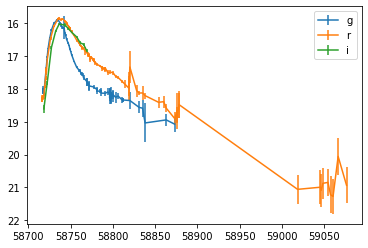

In [38]:

start_mjd = 58716
#end_mjd = 58820
#end_mjd = 58900
end_mjd = 61000

for band in 'gri':
    idx = np.logical_and(nora['filter'] == band, np.logical_and(nora['mjd'] > start_mjd, nora['mjd'] < end_mjd))
    idx = np.logical_and(idx, nora['mag_unc'] < 0.6)
    plt.errorbar(nora['mjd'][idx], nora['mag'][idx], yerr=nora['mag_unc'][idx], label=band)
plt.legend()
plt.gca().invert_yaxis()

In [39]:
start_mjd = 58716
#end_mjd = 58820
end_mjd = 58900

for band in 'gri':
    idx = np.logical_and(ztflc['filter'] == ('ZTF_%s' % band), np.logical_and(ztflc['obsmjd'] > start_mjd, ztflc['obsmjd'] < end_mjd))
    plt.plot(ztflc['obsmjd'][idx], ztflc['mag'][idx], label=band)
plt.legend()
plt.gca().invert_yaxis()

KeyError: 'mag_err'